## Exploratory Data Analysis ( EDA )

In [ ]:
#https://realpython.com/pandas-plot-python/
#https://www.ibm.com/topics/exploratory-data-analysis#:~:text=Exploratory%20data%20analysis%20(EDA)%20is,often%20employing%20data%20visualization%20methods.
#https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
#https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/

## Overall EDA

### *Capstone- Data Import Exercise*

In [295]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns # Visualisation

%matplotlib inline
sns.set(color_codes=True)
# create tables
from tabulate import tabulate

# libraries for calculations & analysis
import statistics
import pylab
from scipy import stats

In [296]:
# Set global font settings
plt.rc('axes', titlesize=16, titleweight='bold', labelsize=14, labelweight='bold')  # For axes title and labels
plt.rc('xtick', labelsize=12)  # For x-axis tick labels
plt.rc('ytick', labelsize=12)  # For y-axis tick labels

### *Exploring the CSV files*

In [297]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\Production-Data.csv'
Production_Data = pd.read_csv(file_path)

In [298]:
Production_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9487 entries, 0 to 9486
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SKU                    9487 non-null   int64  
 1   SKU_DESCRIPTION        9487 non-null   object 
 2   BATCHID                9487 non-null   int64  
 3   Recipe                 9487 non-null   object 
 4   Tank                   9487 non-null   object 
 5   Unit                   9487 non-null   object 
 6   Instruction_Step       9462 non-null   object 
 7   Source                 9487 non-null   object 
 8   Material_ID            2443 non-null   object 
 9   Material_Name          1980 non-null   object 
 10  Quantity               9487 non-null   float64
 11  Phase_start            9487 non-null   object 
 12  Phase_end              9487 non-null   object 
 13  Phase_duration         9487 non-null   int64  
 14  Phase_start_delay      9487 non-null   int64  
 15  Phas

In [299]:
#Production_Data

## Data Preprocessing - Removal of unwanted columns and renaming columns

In [300]:
# rename the existing DataFrame (rather than creating a copy)
Production_Data.rename(columns={'SKU': 'Material','Unit':'Tank_1','Material_ID':'INGRED_ID','Material_Name':'INGRED_Name'}, inplace=True)

In [301]:
Production_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9487 entries, 0 to 9486
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Material               9487 non-null   int64  
 1   SKU_DESCRIPTION        9487 non-null   object 
 2   BATCHID                9487 non-null   int64  
 3   Recipe                 9487 non-null   object 
 4   Tank                   9487 non-null   object 
 5   Tank_1                 9487 non-null   object 
 6   Instruction_Step       9462 non-null   object 
 7   Source                 9487 non-null   object 
 8   INGRED_ID              2443 non-null   object 
 9   INGRED_Name            1980 non-null   object 
 10  Quantity               9487 non-null   float64
 11  Phase_start            9487 non-null   object 
 12  Phase_end              9487 non-null   object 
 13  Phase_duration         9487 non-null   int64  
 14  Phase_start_delay      9487 non-null   int64  
 15  Phas

In [302]:
# show the shape of the data frame

rows, columns = Production_Data.shape

print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 9487
Number of columns: 22


In [303]:
# show the shape of the data frame
Production_Data.count()

Material                 9487
SKU_DESCRIPTION          9487
BATCHID                  9487
Recipe                   9487
Tank                     9487
Tank_1                   9487
Instruction_Step         9462
Source                   9487
INGRED_ID                2443
INGRED_Name              1980
Quantity                 9487
Phase_start              9487
Phase_end                9487
Phase_duration           9487
Phase_start_delay        9487
Phase_row_no             9487
Flowrate_KGMIN           9487
Target_Flowrate          3108
Target_Phase_duration    9487
Phase_overrun            7363
Batch_Phase_Type         9487
Deaeration Phase         9487
dtype: int64

In [304]:
# Removal of unwanted columns from dataset
Production_Data1=Production_Data.drop(['SKU_DESCRIPTION', 'Recipe','Source','Tank', 'Batch_Phase_Type'], axis=1)

In [305]:
# Define a dictionary of replacements
replacements = {
    'U_25MT02' : '2502',
    'U_25MT03' : '2503',
    'U_25MT04' : '2504',
    'U_26MT01' : '2601',
    'U_23MT02' : '2302',
    'U_23MT04' : '2304',
    'U_25MT01' : '2501',
    'U_23MT05' : '2305',
    'U_25MT02' : '2502',
    'U_22MT04' : '2204',
    'U_22MT03' : '2203',
    'U_22MT02' : '2202',
    'U_26MT04' : '2604',
    'U_26MT03' : '2603',
    'U_23MT03' : '2303',
    'U_22MT01' : '2201',
    'U_23MT01' : '2301',
    'U_22MT05' : '2205',
    'U_26MT02' : '2602'
}

# Replace values in the 'TankName' column
Production_Data1['Tank_1'].replace(replacements, inplace=True)

# Print the modified DataFrame
print(Production_Data1)

      Material    BATCHID Tank_1  \
0      1002150  107643491   2503   
1      1002150  107643491   2503   
2      1002150  107643491   2503   
3      1002150  107643491   2503   
4      1002150  107643491   2503   
...        ...        ...    ...   
9482   3055706  107737576   2502   
9483   3055706  107737576   2502   
9484   3055706  107737576   2502   
9485   3055706  107737576   2502   
9486   3055706  107737576   2502   

                                   Instruction_Step INGRED_ID  \
0                              S3_BATCH_IN_PROGRESS       NaN   
1                                        STEP1_CONS   1002565   
2                       PLEASE VERIFY BULK ADDITION       NaN   
3                                        STEP1_CONS   1037802   
4                                        STEP1_CONS   1002818   
...                                             ...       ...   
9482               TAKE A SAMPLE AND SUBMIT FOR QA.       NaN   
9483  SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGEN

In [306]:
# drop duplicate rows from the DataFrame

#uploaded_df1.drop_duplicates(inplace=True)

In [307]:
# Step 1: Create a DataFrame with all duplicates
duplicates_df = Production_Data1[Production_Data1.duplicated(keep=False)]

# Step 2: Remove duplicates from the original DataFrame
Production_Data1.drop_duplicates(inplace=True)

# Step 3: Check the duplicates_df to see what rows were duplicates
print(duplicates_df)

Empty DataFrame
Columns: [Material, BATCHID, Tank_1, Instruction_Step, INGRED_ID, INGRED_Name, Quantity, Phase_start, Phase_end, Phase_duration, Phase_start_delay, Phase_row_no, Flowrate_KGMIN, Target_Flowrate, Target_Phase_duration, Phase_overrun, Deaeration Phase]
Index: []


In [308]:
Production_Data1.count()

Material                 9487
BATCHID                  9487
Tank_1                   9487
Instruction_Step         9462
INGRED_ID                2443
INGRED_Name              1980
Quantity                 9487
Phase_start              9487
Phase_end                9487
Phase_duration           9487
Phase_start_delay        9487
Phase_row_no             9487
Flowrate_KGMIN           9487
Target_Flowrate          3108
Target_Phase_duration    9487
Phase_overrun            7363
Deaeration Phase         9487
dtype: int64

In [309]:
# Count the number of missing values in each column

print(Production_Data1.isnull().sum())

Material                    0
BATCHID                     0
Tank_1                      0
Instruction_Step           25
INGRED_ID                7044
INGRED_Name              7507
Quantity                    0
Phase_start                 0
Phase_end                   0
Phase_duration              0
Phase_start_delay           0
Phase_row_no                0
Flowrate_KGMIN              0
Target_Flowrate          6379
Target_Phase_duration       0
Phase_overrun            2124
Deaeration Phase            0
dtype: int64


In [310]:
# Filter rows where any column has a missing value
#rows_with_missing = Production_Data1[Production_Data1.isnull().any(axis=1)]

# Display the rows with missing values
#print(rows_with_missing)

# Check the data types of the columns
#print(rows_with_missing.dtypes)

In [311]:
#import pandas as pd

# Assuming you have a DataFrame named 'df'
# Replace null values with 0
#df_filled = uploaded_df1.fillna(0)
#uploaded_df2=uploaded_df1.fillna(0)
# Display the DataFrame with null values replaced
#print(uploaded_df2)

In [312]:
print(Production_Data1.isnull().sum())

Material                    0
BATCHID                     0
Tank_1                      0
Instruction_Step           25
INGRED_ID                7044
INGRED_Name              7507
Quantity                    0
Phase_start                 0
Phase_end                   0
Phase_duration              0
Phase_start_delay           0
Phase_row_no                0
Flowrate_KGMIN              0
Target_Flowrate          6379
Target_Phase_duration       0
Phase_overrun            2124
Deaeration Phase            0
dtype: int64


In [313]:
Production_Data1.head()

,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0


### Create A new csv file with tank names updated- to used in each tank python notebook  

In [314]:
# Create A new csv file with tank names updated- to used in each tank python notebook  
#Production_Data1.to_csv('C:/Users/User/Desktop/Thesis 2023/Capstone---CCT/Python Working Notebooks/ProductionDataupdated1.csv')

In [315]:
#Production_Data1

### Exploring the common materials between all the production Tanks 

In [316]:
# To see what materials were producted in what tanks - are there a cross over

import pandas as pd

# Load your production tank DataFrame
df = pd.DataFrame(Production_Data1)

# Group the data by 'Tank' and collect unique materials produced in each tank
tank_material_mapping = Production_Data1.groupby('Tank_1')['Material'].unique()
tank_material_mapping


Tank_1
2201    [1397022, 1428047, 1451704, 1520984, 1567195, ...
2202    [1397022, 1428047, 1451704, 1451710, 1520984, ...
2203    [1397022, 1428047, 1451704, 1451710, 1520984, ...
2204    [1397022, 1428047, 1520984, 1567195, 1648637, ...
2205    [1397022, 1428047, 1451704, 1451710, 1520984, ...
2301    [1397022, 1428047, 1451710, 1520984, 1567195, ...
2302    [1397022, 1428047, 1451704, 1451710, 1520984, ...
2303    [1397022, 1428047, 1451704, 1451710, 1520984, ...
2304    [1397022, 1428047, 1451704, 1451710, 1520984, ...
2305    [1397022, 1428047, 1451710, 1520984, 1567195, ...
2501    [1006884, 1172415, 1172993, 1397022, 1486042, ...
2502    [1006884, 1172415, 1172993, 1397022, 1486042, ...
2503    [1002150, 1002373, 1172415, 1172898, 1172919, ...
2504    [1002150, 1002373, 1172415, 1172898, 1172919, ...
2601    [1036590, 1045448, 1368236, 1397022, 1527533, ...
2602    [1036590, 1045448, 1368236, 1397022, 1513667, ...
2603    [1036590, 1045448, 1368236, 1397022, 1513667, ...
2604   

In [317]:
# Load your dataset DataFrame
df = pd.DataFrame(Production_Data1)
# Group the data by 'Material_Name' and 'Tank' and count unique BatchIDs
batch_count_per_material_per_tank = df.groupby(['Material', 'Tank_1'])['BATCHID'].nunique()
print(batch_count_per_material_per_tank)

Material  Tank_1
1002150   2503       6
          2504       6
1002373   2503       3
          2504       3
1006884   2501       3
                    ..
3044756   2502       2
          2503      11
          2504      11
3055706   2501       1
          2502       1
Name: BATCHID, Length: 210, dtype: int64


In [318]:
# Convert the grouped data to a new DataFrame
new_df = batch_count_per_material_per_tank.reset_index()

# Rename the 'BATCHID' column to 'Batch_Count'
new_df.rename(columns={'BATCHID': 'Batch_Count'}, inplace=True)

# Print the new DataFrame
print(new_df)

     Material Tank_1  Batch_Count
0     1002150   2503            6
1     1002150   2504            6
2     1002373   2503            3
3     1002373   2504            3
4     1006884   2501            3
..        ...    ...          ...
205   3044756   2502            2
206   3044756   2503           11
207   3044756   2504           11
208   3055706   2501            1
209   3055706   2502            1

[210 rows x 3 columns]


## Graphing the CSV file: examining the various relationships between the variables

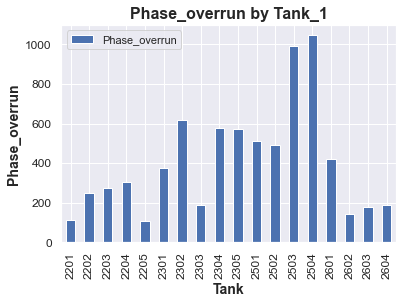

In [319]:
# uploaded_df

Production_Data1[['Phase_overrun','Tank_1']].groupby(by='Tank_1').count().plot.bar()

plt.title('Phase_overrun by Tank_1')
plt.xlabel('Tank')
plt.ylabel('Phase_overrun')
plt.xticks(rotation = 90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

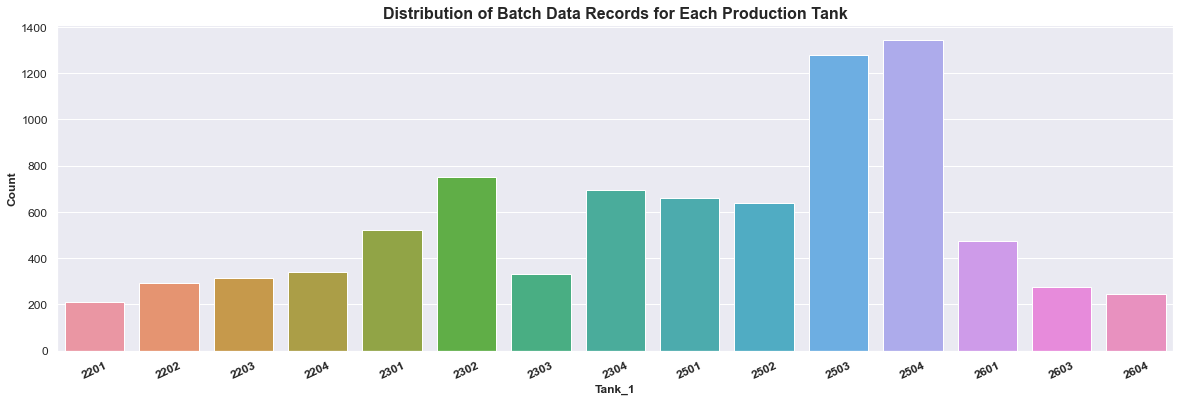

In [320]:
# Bar Chart (Categorical Variables)
   
order = ['2201', '2202', '2203', '2204','2301','2302', '2303', '2304', '2501', '2502', '2503', '2504', '2601', '2603', '2604']
plt.figure(figsize=(20, 6))
sns.countplot(data=Production_Data1, x='Tank_1',order=order)
# Rotate x-axis labels for better readability
plt.xticks(rotation=25, fontsize=12, fontweight='bold') 

# Set y-axis label with increased font size and bold font
plt.ylabel('Count', fontsize=12, fontweight='bold')

# Set x-axis label with increased font size and bold font
plt.xlabel('Tank_1', fontsize=12, fontweight='bold') 

# Set the title with increased font size and bold font
plt.title('Distribution of Batch Data Records for Each Production Tank', fontsize=16, fontweight='bold')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

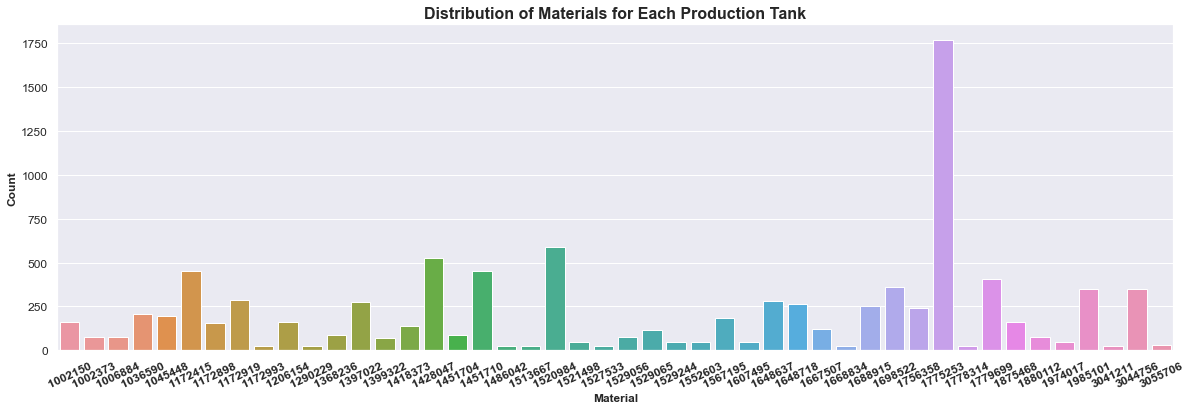

In [321]:
# Bar Chart (Categorical Variables)

#order = ['2201', '2202', '2203', '2204','2204','2301','2302', '2303', '2304', '2501', '2502', '2503', '2504', '2601', '2603', '2604']
plt.figure(figsize=(20, 6))
sns.countplot(data=Production_Data1, x='Material')


# Rotate x-axis labels for better readability
plt.xticks(rotation=25, fontsize=12, fontweight='bold') 

# Set y-axis label with increased font size and bold font
plt.ylabel('Count', fontsize=12, fontweight='bold')

# Set x-axis label with increased font size and bold font
plt.xlabel('Material', fontsize=12, fontweight='bold') 

# Set the title with increased font size and bold font
plt.title('Distribution of Materials for Each Production Tank', fontsize=16, fontweight='bold')
plt.show


In [322]:
numeric_columns = ['Material','Deaeration Phase','Phase_row_no','Quantity','Phase_duration', 'Phase_overrun', 'Phase_start_delay','Flowrate_KGMIN']

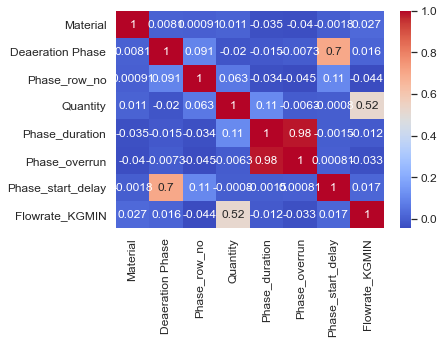

In [323]:
# Correlation heatmap to visualize correlation between numeric variables
correlation_matrix = Production_Data1[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [324]:
Production_Data1.describe()

,Material,BATCHID,Quantity,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
count,9.487000e+03,9.487000e+03,9487.000000,9487.000000,9487.000000,9487.000000,9487.000000,3108.000000,9487.000000,7363.000000,9487.000000
mean,1.607941e+06,1.078345e+08,1114.387758,38.275008,64.004005,8.521450,34.971681,137.720966,22.486561,22.624338,0.029830
std,3.956424e+05,1.534465e+05,3550.912601,132.431479,438.024750,6.312805,143.649431,228.811394,45.997016,140.615438,0.170128
min,1.002150e+06,1.075483e+08,0.000000,0.000000,0.000000,1.000000,0.000000,4.488600,0.000000,0.000000,0.000000
25%,1.418373e+06,1.077060e+08,0.000000,0.000000,0.000000,3.000000,0.000000,14.857700,2.000000,0.000000,0.000000
50%,1.648637e+06,1.078320e+08,0.000000,8.000000,0.000000,6.000000,0.000000,45.283300,10.000000,1.000000,0.000000
75%,1.775253e+06,1.079637e+08,75.002000,49.000000,1.000000,13.000000,4.567300,79.016000,17.000000,13.000000,0.000000
max,3.055706e+06,1.080913e+08,28408.764000,5941.000000,6582.000000,32.000000,6251.000000,965.083300,2584.000000,5931.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

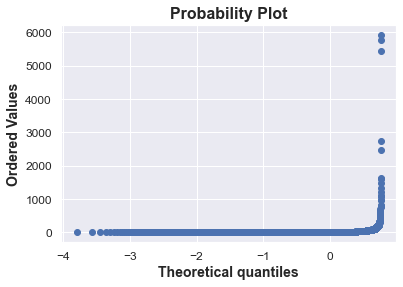

In [325]:
# check the normal distribution of the variables

stats.probplot(Production_Data1['Phase_overrun'], dist='norm', plot=pylab);
pylab.show

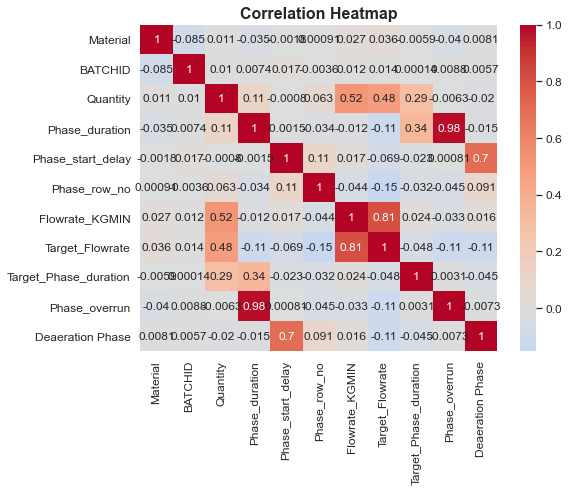

In [326]:
correlation_matrix = Production_Data1.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

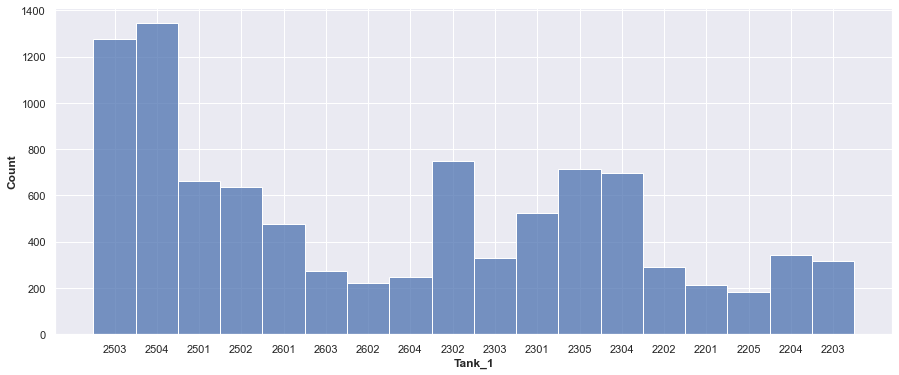

In [327]:
# Using seaborn
sns.set(rc={"figure.figsize":(15, 6)}) #width=10, #height=6
sns.histplot(data=Production_Data1, x='Tank_1', bins=30, kde=False)
plt.show()

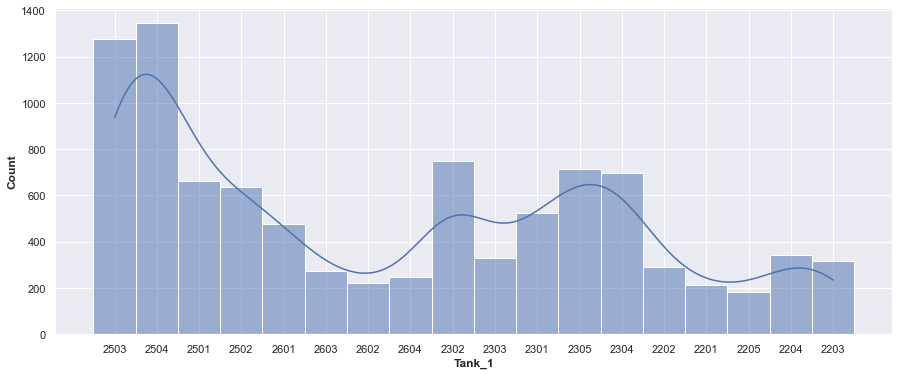

In [328]:
# Using seaborn
sns.histplot(data=Production_Data1, x='Tank_1', bins=30, kde=True)
plt.show()

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [330]:
df2 = pd.DataFrame(Production_Data1)
#df2 = pd.DataFrame(aggregated_ProductionTank22_df2)

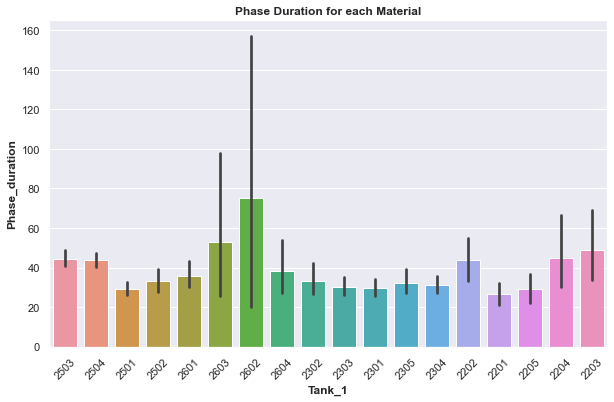

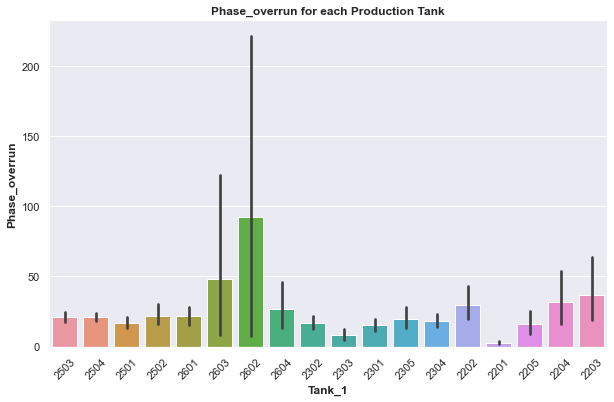

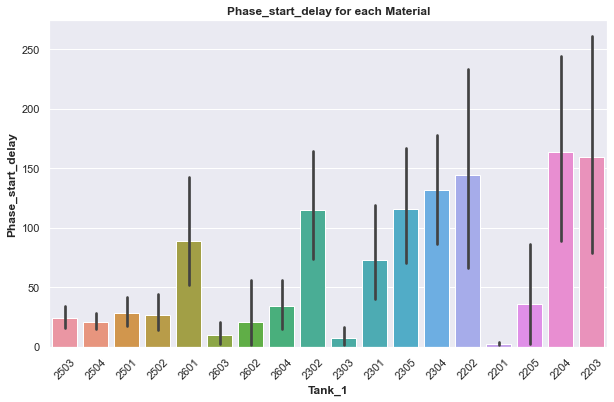

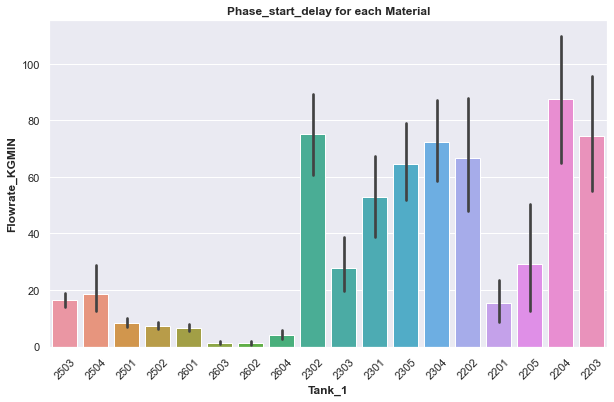

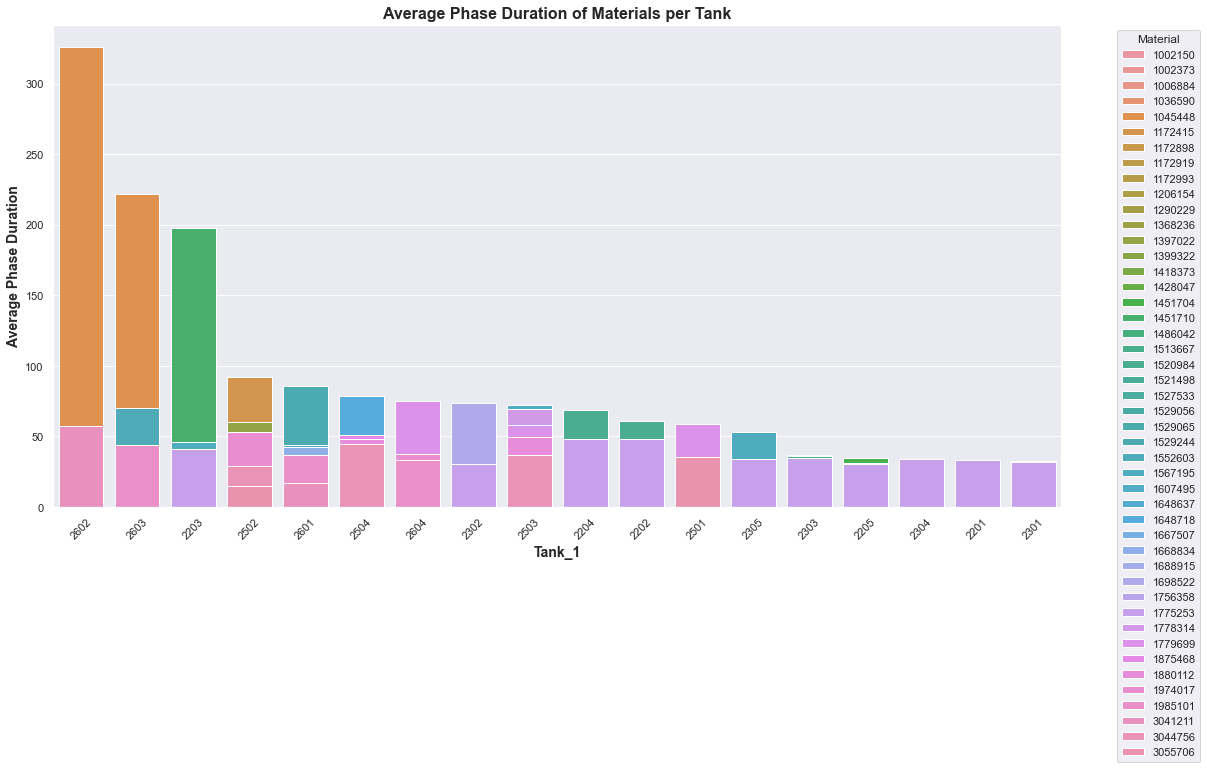

TypeError: __init__() got an unexpected keyword argument 'fontweight'

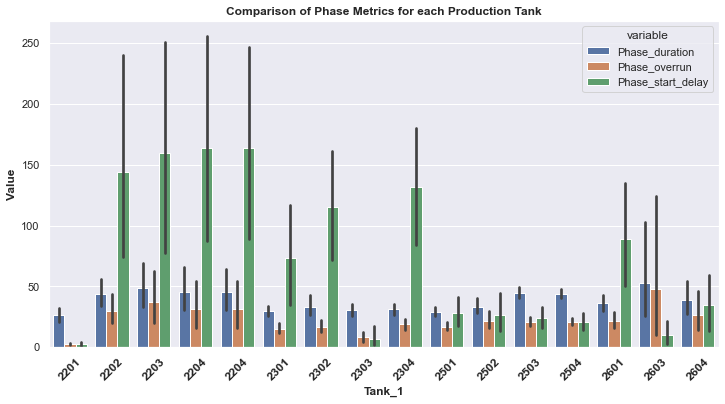

In [331]:
# 1. Bar Chart - Phase_duration for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Tank_1', y='Phase_duration', data=df2)
plt.title('Phase Duration for each Material')
plt.xticks(rotation=45)
plt.show()

# 1. Bar Chart - Phase_Overrun for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Tank_1', y='Phase_overrun', data=df2)
plt.title('Phase_overrun for each Production Tank')
plt.xticks(rotation=45)
plt.show()

# 1. Bar Chart - Phase_start_delay for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Tank_1', y='Phase_start_delay', data=df2)
plt.title('Phase_start_delay for each Material')
plt.xticks(rotation=45)
plt.show()

# 1. Bar Chart - Phase_start_delay for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Tank_1', y='Flowrate_KGMIN', data=df2)
plt.title('Phase_start_delay for each Material')
plt.xticks(rotation=45)
plt.show()

# 7. BarPlot - Sorting the materials per tank in terms of phase duration 
# Grouping and aggregating the data
agg_data = df2.groupby(['Tank_1', 'Material'])['Phase_duration'].mean().reset_index()

# Sorting the data for better visualization
agg_data = agg_data.sort_values(by='Phase_duration', ascending=False)

# Plotting the data
plt.figure(figsize=(15, 10))
p = sns.barplot(data=agg_data, x='Tank_1', y='Phase_duration', hue='Material', dodge=False)
p.set_title('Average Phase Duration of Materials per Tank', fontsize=16)
p.set_xlabel('Tank_1', fontsize=14)
p.set_ylabel('Average Phase Duration', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Melt the data to get it in long form
df_melted = df.melt(id_vars='Tank_1', value_vars=['Phase_duration', 'Phase_overrun', 'Phase_start_delay'])
order = ['2201', '2202', '2203', '2204','2204','2301','2302', '2303', '2304', '2501', '2502', '2503', '2504', '2601', '2603', '2604']
# Grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Tank_1', y='value', hue='variable', data=df_melted,order=order)
plt.title('Comparison of Phase Metrics for each Production Tank',fontsize=12, fontweight='bold')
plt.ylabel('Value',fontsize=12, fontweight='bold')
plt.xticks(rotation=45,fontsize=12, fontweight='bold')
# Set x-axis label with increased font size and bold font
plt.xlabel('Tank_1', fontsize=12, fontweight='bold') 

plt.legend(title='Metrics',fontsize=12, fontweight='bold')
plt.show()


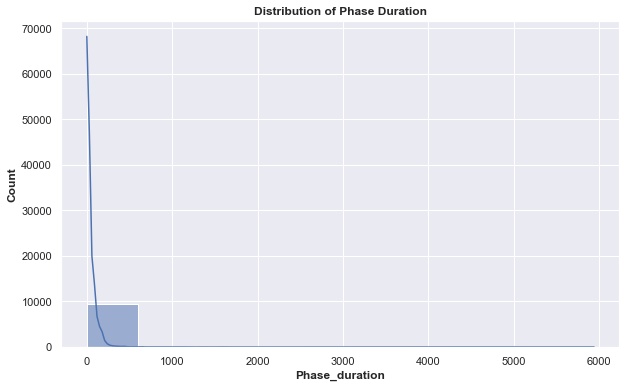

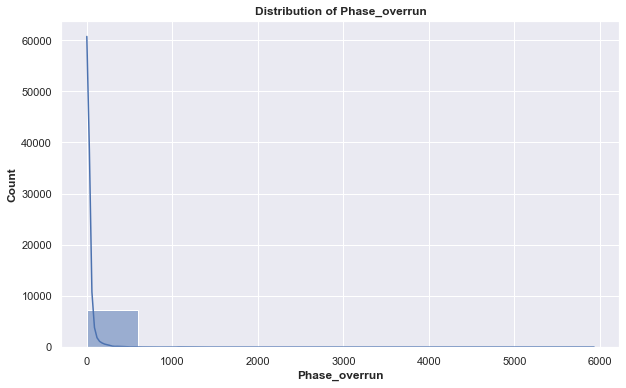

In [332]:
# 2. Histogram - Phase_duration
plt.figure(figsize=(10, 6))
sns.histplot(df2['Phase_duration'], bins=10, kde=True)
plt.title('Distribution of Phase Duration')
plt.show()

# 2. Histogram - Phase_overrun
plt.figure(figsize=(10, 6))
sns.histplot(df2['Phase_overrun'], bins=10, kde=True)
plt.title('Distribution of Phase_overrun')
plt.show()


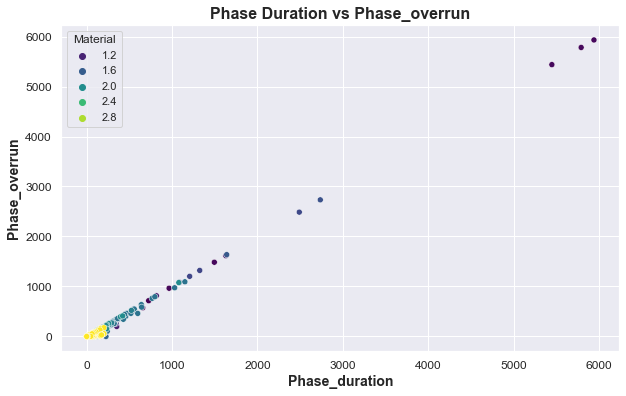

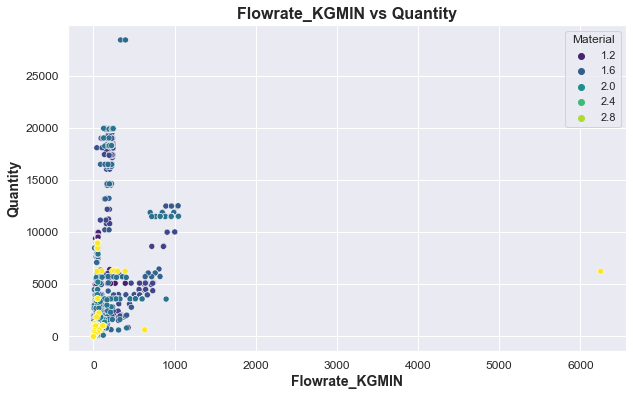

In [333]:
# 3. Scatter Plot - Phase_duration vs Phase_start_delay
# Set global font settings
plt.rc('axes', titlesize=16, titleweight='bold', labelsize=14, labelweight='bold')  # For axes title and labels
plt.rc('xtick', labelsize=12)  # For x-axis tick labels
plt.rc('ytick', labelsize=12)  # For y-axis tick labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Phase_duration', y='Phase_overrun', data=df2, hue='Material', palette='viridis')
plt.title('Phase Duration vs Phase_overrun')
plt.show()

# 3. Scatter Plot - 'Flowrate_KGMIN' vs 'Quantity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flowrate_KGMIN', y='Quantity', data=df2, hue='Material', palette='viridis')
plt.title('Flowrate_KGMIN vs Quantity')
plt.show()

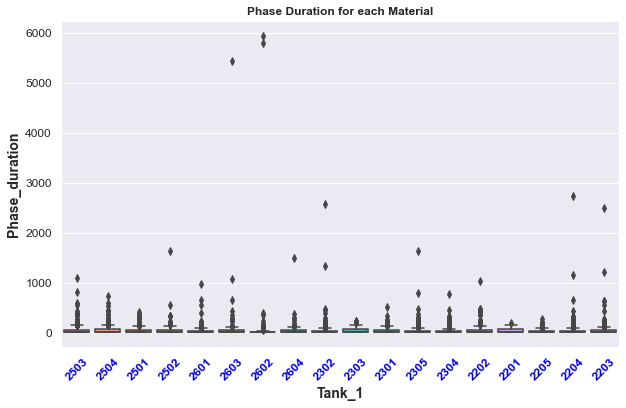

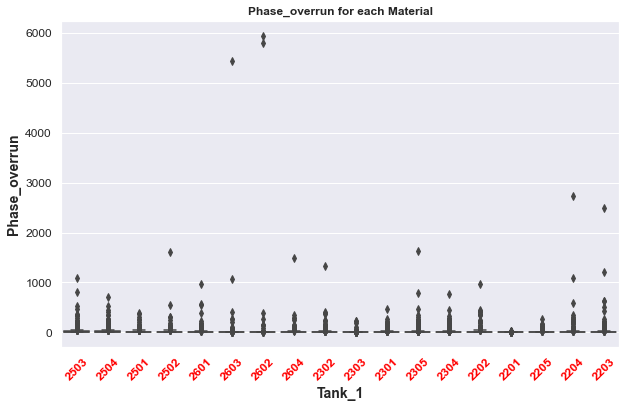

In [334]:
# 4. Box Plot - Phase_duration grouped by Material
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tank_1', y='Phase_duration', data=df2)
plt.title('Phase Duration for each Material',fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='blue')

# 4. Box Plot - Phase_overrun grouped by Material
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tank_1', y='Phase_overrun', data=df2)
plt.title('Phase_overrun for each Material',fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='red')
plt.show()

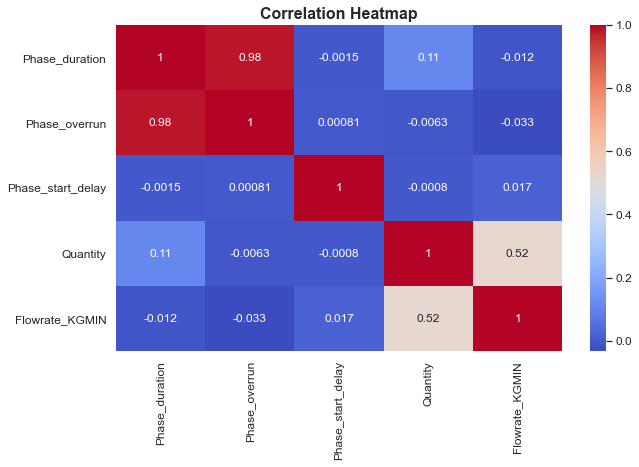

In [335]:
# 5. Heatmap - Correlation heatmap
correlation_matrix = df2[['Phase_duration', 'Phase_overrun', 'Phase_start_delay','Quantity','Flowrate_KGMIN']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
sns.pairplot(df2, vars=['Phase_duration', 'Phase_overrun', 'Phase_start_delay','Quantity','Flowrate_KGMIN'])
plt.show()


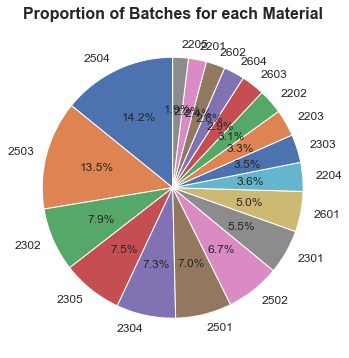

In [336]:
# 6. Pie Chart - Proportion of batches for each Material
Tank_counts = df2['Tank_1'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(Tank_counts, labels=Tank_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Batches for each Material')
plt.show()

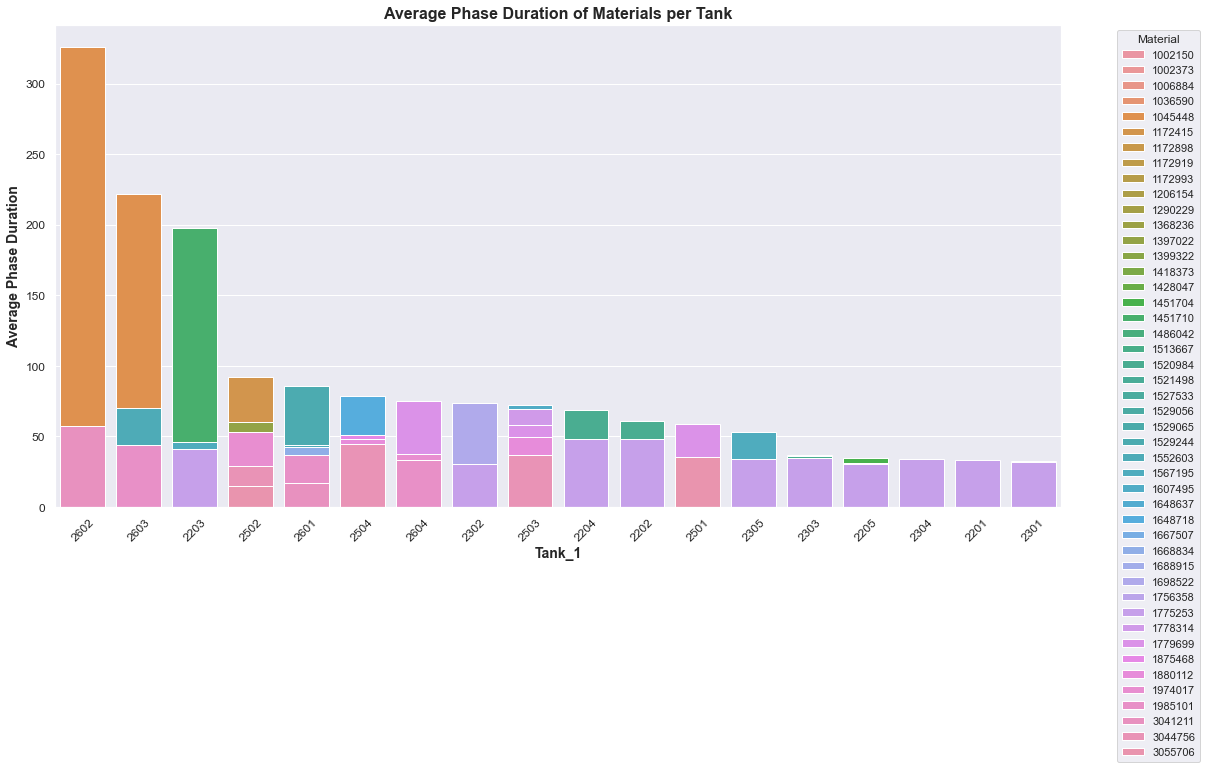

TypeError: __init__() got an unexpected keyword argument 'fontweight'

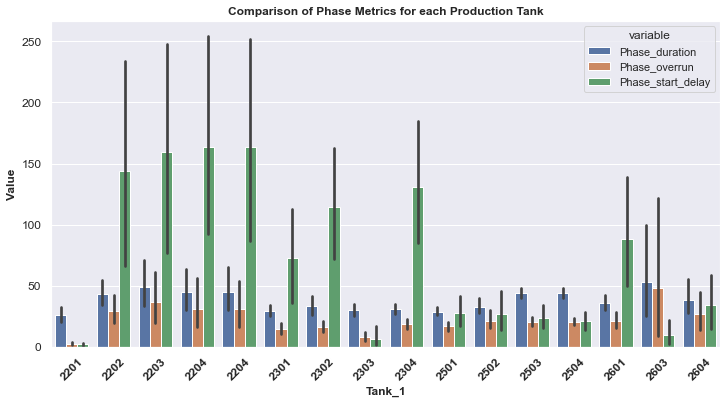

In [337]:
# 7. BarPlot - Sorting the materials per tank in terms of phase duration 
# Grouping and aggregating the data
agg_data = df2.groupby(['Tank_1', 'Material'])['Phase_duration'].mean().reset_index()

# Sorting the data for better visualization
agg_data = agg_data.sort_values(by='Phase_duration', ascending=False)

# Plotting the data
plt.figure(figsize=(15, 10))
p = sns.barplot(data=agg_data, x='Tank_1', y='Phase_duration', hue='Material', dodge=False)
p.set_title('Average Phase Duration of Materials per Tank', fontsize=16)
p.set_xlabel('Tank_1', fontsize=14)
p.set_ylabel('Average Phase Duration', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Melt the data to get it in long form
df_melted = df.melt(id_vars='Tank_1', value_vars=['Phase_duration', 'Phase_overrun', 'Phase_start_delay'])
order = ['2201', '2202', '2203', '2204','2204','2301','2302', '2303', '2304', '2501', '2502', '2503', '2504', '2601', '2603', '2604']
# Grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Tank_1', y='value', hue='variable', data=df_melted,order=order)
plt.title('Comparison of Phase Metrics for each Production Tank',fontsize=12, fontweight='bold')
plt.ylabel('Value',fontsize=12, fontweight='bold')
plt.xticks(rotation=45,fontsize=12, fontweight='bold')
# Set x-axis label with increased font size and bold font
plt.xlabel('Tank_1', fontsize=12, fontweight='bold') 

plt.legend(title='Metrics',fontsize=12, fontweight='bold')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called "df" and tanks are in a column named "Tank"
sns.boxplot(x="Tank_1", y="Phase_duration", data=df2)

plt.show()

#### Exploring the different deaeration times ( start Phase delay duration) for each of the groups of productions tanks and their common materials 

## Ingredient Addition = Instruction Step  STEP1_CONS   ~EDA

In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns # Visualisation

%matplotlib inline
sns.set(color_codes=True)
# create tables
from tabulate import tabulate

# libraries for calculations & analysis
import statistics
import pylab
from scipy import stats

In [ ]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
uploaded_df = pd.read_csv(file_path)

In [ ]:
uploaded_df.info()

## Step1_CONS - Addition of Raw Ingredients¶

## Examining the Phase duration times for the STEP1_CONS - Addition of all raw ingredients to the production tanks

In [ ]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(uploaded_df)

# 'STEP1_CONS - refers to the instruction step of the manual addition of ingredients to the production tank'
# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_CONS']
filtered_data = data[data['Instruction_Step'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material', 'Instruction_Step'])['Phase_overrun'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_overrun', hue='Instruction_Step', ci=None)
plt.title('Total Ingredient Addition for Each Production Tank by Phase_overrun')
plt.ylabel('Total Phase Overrun')
plt.xlabel('Tank')
plt.legend(title='Ingredient addition phase')
plt.show()

In [ ]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(uploaded_df)


# Filter the dataframe for desired instruction steps
desired_steps = ['1461896', '1254972', '1031006','1243269','1196706','1815609','1037802','1002874','1002818','1031021','1002910']
filtered_data = data[data['INGRED_ID'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material','INGRED_ID'])['Phase_duration'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_duration', hue='INGRED_ID', ci=None)
plt.title('Total Phase Duration for Each Tank by Phase')
plt.ylabel('Total Duration')
plt.xlabel('Tank')
plt.legend(title='Phase Name')
plt.show()

In [ ]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(uploaded_df)


# Filter the dataframe for desired instruction steps
desired_steps = ['1461896', '1254972', '1031006','1243269','1196706','1815609','1037802','1002874','1002818','1031021','1002910']
filtered_data = data[data['INGRED_ID'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
totalOverrun_durations = filtered_data.groupby(['Tank_1', 'Material','INGRED_ID'])['Phase_overrun'].sum().reset_index()

# Present in table format
#print(tabulate(totalOverrun_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=totalOverrun_durations, x='Tank_1', y='Phase_overrun', hue='INGRED_ID', ci=None)
plt.ylabel('Total Overrun Phase by INGRED_ID')
plt.xlabel('Tank')
plt.title('Total Overrun Phase for Each Tank by INGRED_ID')
plt.legend(title='INGRED_ID',loc='upper right')
plt.show()

## Determining the effect of ingredient type addition on the Phase Overrun times per Production Tank by EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(uploaded_df)

# Group data by 'unit' and calculate the mean phase overrun for each unit and material combination
grouped_data = df.groupby(['Tank_1','INGRED_ID'])['Phase_overrun'].mean().reset_index()

# Define the threshold value above which points will be colored differently
threshold = 75  # Adjust this value as needed

# Create a separate plot for each unit
units = grouped_data['Tank_1'].unique()
for Tank_1 in units:
    unit_data = grouped_data[grouped_data['Tank_1'] == Tank_1]
    
    plt.figure(figsize=(20, 6))
    
    # Scatter plot for points below threshold
    plt.scatter(unit_data[unit_data['Phase_overrun'] <= threshold]['INGRED_ID'],
                unit_data[unit_data['Phase_overrun'] <= threshold]['Phase_overrun'],
                label=f'Unit {Tank_1} (<= {threshold})', color='blue')
    
    # Scatter plot for points above threshold
    plt.scatter(unit_data[unit_data['Phase_overrun'] > threshold]['INGRED_ID'],
                unit_data[unit_data['Phase_overrun'] > threshold]['Phase_overrun'],
                label=f'Unit {Tank_1} (> {threshold})', color='red', marker='x')
    
    plt.xlabel('INGRED_ID')
    plt.ylabel('Mean Phase Overrun')
    plt.title(f'Mean Phase Overrun vs. Material ID for Tank_1 {Tank_1}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

### Examining The ingredient addition per tank grp for their common materials produced EDA

In [ ]:
## Ingredient Addition - STEP1_CONS  tanks_in_group1 = ['2202', '2203', '2204']

In [ ]:
tanks_in_group1 = [2202, 2203, 2204]
instruction_step_of_interest ="STEP1_CONS"

In [ ]:

Data = pd.DataFrame(uploaded_df)
#Data
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                   (Data['Instruction_Step'] == instruction_step_of_interest)]
#filtered_data

In [ ]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [ ]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]
filtered_data

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_overrun', hue='Tank_1', ci=None)

plt.title('Phase_overrun for Common Materials during Ingredient Addition Phase Across Tanks in Group1')
plt.ylabel('Phase_overrun')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
####  Ingredient Addition - STEP1_CONS  Production Tanks  : '2302', '2304', '2305'

In [ ]:
tanks_in_group1 = [2302, 2304, 2305]
instruction_step_of_interest ="STEP1_CONS"

In [ ]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [ ]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [ ]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_duration', hue='Tank_1', ci=None)

plt.title('Phase_overrun for Common Materials during Ingredient Addition Phase Across Tanks')
plt.ylabel('Phase_overrun')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#### Production Tanks : '2501', '2502'

In [ ]:
tanks_in_group1 = [2501, 2502]
instruction_step_of_interest ="STEP1_CONS"
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]

plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_duration', hue='Tank_1', ci=None)

plt.title('Phase_overrun for Common Materials during Ingredient Addition Phase Across Tanks')
plt.ylabel('Phase_overrun')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#### Production Tanks : '2503','2504'

In [ ]:
tanks_in_group1 = [2503,2504]
instruction_step_of_interest ="STEP1_CONS"
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]

plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_duration', hue='Tank_1', ci=None)

plt.title('Phase_overrun for Common Materials during Ingredient Addition Phase Across Tanks')
plt.ylabel('Phase_overrun')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#### Production Tanks : 2603,2604,2602,2601

In [ ]:
tanks_in_group1 = [2603,2604,2602,2601]
instruction_step_of_interest ="STEP1_CONS"
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

#common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()
#filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]

plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_duration', hue='Tank_1', ci=None)

plt.title('Phase_overrun for Common Materials during Ingredient Addition Phase Across Tanks')
plt.ylabel('Phase_overrun')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Examining Ingredient specific : Mucilage /GUM Addition and Phase overrun times by EDA

In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [ ]:
# Data Collection:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [ ]:
ProductionTank.head()

In [ ]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
#data = pd.DataFrame(ProductionTank) 
# Count the unique materialsProductionTank produced by each tank
Batch_counts =ProductionTank.groupby('Tank_1')['BATCHID'].nunique().reset_index()
print(Batch_counts)


### NOTE : INGRED_ID - Gum ingredient Identifier

In [ ]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)
#specific_tanks = ['2202', '2203', '2204','2205']

specific_tanks = [2202,2203,2204,2302,2304,2305,2501,2502,2503,2504,2601]

# Filter the dataframe for desired instruction steps
INGRED_ID = ['1461896','1254972','1031006','1243269','1815609','1196706']

filtered_data = data[(data['INGRED_ID'].isin(INGRED_ID)) & (data['Tank_1'].isin(specific_tanks))]

#INGRED_ID = ['1461896','1254972','1031006','1243269','1815609','1196706']

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material','INGRED_ID'])['Phase_duration'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_duration',hue='INGRED_ID', ci=None)
plt.title('Total Phase_duration for Each Tank by Phase')
plt.ylabel('Phase_duration')
plt.xlabel('Tank')
plt.legend(title='Phase_duration')
plt.show()

#Aggregate data per tank
aggregated_total_durations_df2 = filtered_data.groupby(['Tank_1','BATCHID']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_total_durations_df2)




In [ ]:
# Set global font settings
plt.rc('axes', titlesize=16, titleweight='bold', labelsize=14, labelweight='bold')  # For axes title and labels
plt.rc('xtick', labelsize=12)  # For x-axis tick labels
plt.rc('ytick', labelsize=12)  # For y-axis tick labels

In [ ]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)
#specific_tanks = ['2202', '2203', '2204','2205']

specific_tanks = [2202,2203,2204,2302,2304,2305,2501,2502,2503,2504,2601]

# Filter the dataframe for desired instruction steps
INGRED_ID = ['1461896','1254972','1031006','1243269','1815609','1196706']

filtered_data = data[(data['INGRED_ID'].isin(INGRED_ID)) & (data['Tank_1'].isin(specific_tanks))]

#INGRED_ID = ['1461896','1254972','1031006','1243269','1815609','1196706']

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material','INGRED_ID'])['Phase_overrun'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_overrun',hue='INGRED_ID', ci=None)
plt.title('Total Phase_overrun for Each Tank by Gum Ingredient ID')
plt.ylabel('Phase_overrun')
plt.xlabel('Tank')
plt.legend(title='Gum Ingredient ID')
plt.show()

#Aggregate data per tank
aggregated_total_durations_df2 = filtered_data.groupby(['Tank_1','BATCHID']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_total_durations_df2)




In [ ]:
# uploaded_df

total_durations[['Phase_overrun','INGRED_ID']].groupby(by='INGRED_ID').count().plot.bar()
#plt.figure(figsize=(10, 6))
plt.title('Phase_overrun by INGRED_ID')
plt.xlabel('Material_ID')
plt.ylabel('Phase_overrun')
#plt.xticks(rotation = 90)
#plt.show()

In [ ]:
# Correlation heatmap to visualize correlation between numeric variables
numeric_columns = ['Material','Deaeration Phase','Phase_row_no','Quantity','Phase_duration', 'Phase_overrun', 'Phase_start_delay','Flowrate_KGMIN']
correlation_matrix = filtered_data[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Production Instruction Steps - EDA

In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [ ]:
# Data Collection:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [ ]:
# Set global font settings
plt.rc('axes', titlesize=16, titleweight='bold', labelsize=14, labelweight='bold')  # For axes title and labels
plt.rc('xtick', labelsize=12)  # For x-axis tick labels
plt.rc('ytick', labelsize=12)  # For y-axis tick labels

In [ ]:
#ProductionTank

In [ ]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
import pandas as pd

Data = pd.DataFrame(ProductionTank)


In [ ]:
Data.replace("STEP2_CONS", 
           "STEP2_CONS-Deaeration", 
           inplace=True)

In [ ]:
print(Data[['Instruction_Step', 'Phase_start_delay']].isnull().sum())

In [ ]:
#Data

### Exploring the Instruction steps or phases and the phase start delay times

In [ ]:
grouped_data = Data.groupby('Instruction_Step')['Phase_start_delay','Phase_duration','Phase_overrun'].sum()
print(grouped_data)

In [ ]:
grouped_data = Data.groupby('Instruction_Step')['Phase_start_delay', 'Phase_duration', 'Phase_overrun'].sum()

# Sort by 'Phase_overrun' in descending order
sorted_data = grouped_data.sort_values(by='Phase_overrun', ascending=False)

print(sorted_data)

In [ ]:
grouped_data = Data.groupby('Instruction_Step')['Phase_start_delay'].describe()
print(grouped_data)

In [ ]:
grouped_data = Data.groupby('Instruction_Step')['Phase_start_delay'].describe()
print(grouped_data)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 7))
sns.boxplot(data=Data, x='Instruction_Step', y='Phase_start_delay')
plt.xticks(rotation=45)
plt.title('Distribution of Phase_start_delay by Instruction_Step')
plt.show()

In [ ]:
mean_delays = Data.groupby('Instruction_Step')['Phase_start_delay'].mean()
mean_delays.plot(kind='bar', figsize=(20, 7))
plt.title('Average Phase_start_delay by Instruction_Step')
plt.ylabel('Mean Phase_start_delay')
plt.xlabel('Instruction_Step')
plt.xticks(rotation=45)
plt.show()

In [ ]:
mean_delays = Data.groupby('Instruction_Step')['Phase_overrun'].mean()
mean_delays.plot(kind='bar', figsize=(25, 7))
plt.title('Average Phase_overrun by Instruction_Step')
plt.ylabel('Mean Phase_overrun')
plt.xlabel('Instruction_Step')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filter mean_delays for values greater than 30
filtered_delays = mean_delays[mean_delays > 50]

# Plot the filtered data
filtered_delays.plot(kind='bar', figsize=(25, 7))
plt.title('Instruction_Steps with Average Phase_overrun Greater than 30')
plt.ylabel('Mean Phase_overrun')
plt.xlabel('Instruction_Step')
plt.xticks(rotation=45)
plt.show()

In [ ]:
filtered_data = Data[Data['Instruction_Step'] == 'STEP2_CONS-Deaeration']

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Phase_start_delay'], bins=30, edgecolor='black')
plt.title('Distribution of Phase_start_delay for STEP2_CONS-Deaeration')
plt.xlabel('Phase_start_delay')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_data['Phase_start_delay'])
plt.title('Boxplot of Phase_start_delay for STEP2_CONS')
plt.ylabel('Phase_start_delay')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_data['Phase_start_delay'], shade=True)
plt.title('KDE of Phase_start_delay for STEP2_CONS')
plt.xlabel('Phase_start_delay')
plt.show()

#### Exploring the different deaeration times ( Phase_overrun duration) for each of the groups of productions tanks and their common materials 

#### Deaeration in  Production Tanks : '2202', '2203', '2204'

In [ ]:
tanks_in_group1 = [2202, 2203, 2204]
instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [ ]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [ ]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [ ]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]
#filtered_data

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_overrun', hue='Tank_1', ci=None)

plt.title('Phase_start_delay for Common Materials during Deaeration Phase Across Tanks in Group1')
plt.ylabel('Phase_start_delay')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#### Deaeration in  Production Tanks : '2302', '2304', '2305'

In [ ]:
tanks_in_group1 = ['2302', '2304', '2305']
instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [ ]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [ ]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [ ]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_overrun', hue='Tank_1', ci=None)

plt.title('Phase_overrun for Common Materials during Deaeration Phase Across Tanks in Group1')
plt.ylabel('Phase_overrun')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#### Production Tanks : '2501', '2502'

In [ ]:
tanks_in_group1 = [2501, 2502]
instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [ ]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [ ]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [ ]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_overrun', hue='Tank_1', ci=None)

plt.title('Phase_overrun for Common Materials during Deaeration Phase Across Tanks in Group1')
plt.ylabel('Phase_overrun')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#### Production Tanks : '2503','2504'

In [ ]:
tanks_in_group1 = [2503,2504]
instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [ ]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [ ]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [ ]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_overrun', hue='Tank_1', ci=None)

plt.title('Phase_overrun for Common Materials during Deaeration Phase Across Tanks in Group1')
plt.ylabel('Phase_overrun')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#### Production Tanks : 2603,2604,2602,2601

In [ ]:
tanks_in_group1 = [2603,2604,2602,2601]
instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [ ]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]
#filtered_data

In [ ]:
#common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()
#common_materials

In [ ]:
#filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]
#filtered_data

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_overrun', hue='Tank_1', ci=None)

plt.title('Phase_overrun for Common Materials during Deaeration Phase Across Tanks in Group1')
plt.ylabel('Phase_overrun')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#ingredient_of_interest = ['1461896', '1254972','1031006','1243269','1196706','1815609']
#ingredient_data = data[data['INGRED_ID'] == ingredient_of_interest]

In [ ]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)

# 'STEP1_CONS - refers to the instruction step of the manual addition of ingredients to the production tank'
# Filter the dataframe for desired instruction steps
desired_steps = ['STEP2_CONS-Deaeration']
filtered_data = Data[Data['Instruction_Step'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material', 'Instruction_Step'])['Phase_overrun'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_overrun', hue='Instruction_Step', ci=None)
plt.title('Total Phase Deaeration for Each Production Tank by Phase_overrun')
plt.ylabel('Total Phase Deaeration')
plt.xlabel('Tank')
plt.legend(title='Phase Deaeration phase')
plt.show()

#Aggregate data per tank
aggregated_total_durations_df5 = filtered_data.groupby(['Tank_1','BATCHID','Material']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()


print(aggregated_total_durations_df5)

In [ ]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)
specific_tanks = [2202,2203, 2204]

# Filter the dataframe for desired instruction steps
desired_steps = ['STEP2_CONS-Deaeration']
filtered_data = Data[(Data['Instruction_Step'].isin(desired_steps)) & (Data['Tank_1'].isin(specific_tanks))]


# Calculate total phase duration for each desired instruction step for each tank and material
total_Phase_start_delay = filtered_data.groupby(['Tank_1','Material','Instruction_Step'])['Phase_overrun'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))



#Aggregate data per tank
aggregated_total_durations_df2 = filtered_data.groupby(['Tank_1','BATCHID','Material']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()


print(aggregated_total_durations_df2)

In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

## Agitation Instruction Steps - ALL Production Tank Groups EDA

In [ ]:
# Data Collection:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [ ]:
#ProductionTank.head()

In [ ]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Define a dictionary of replacements
replacements = {
    'U_22MT01 ':'2201',
    'U_23MT01':'2301',
    'U_26MT02':'2602'  
}

# Replace values in the 'TankName' column
ProductionTank['Tank_1'].replace(replacements, inplace=True)

# Print the modified DataFrame
print(ProductionTank)

In [ ]:
## 'STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION'  - Effect of Agitation

In [ ]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)


# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION']

filtered_data = data[data['Instruction_Step'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material'])['Phase_duration'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_duration', ci=None)
plt.title('Phase Duration for Each Tank by Instruction_Step')
plt.ylabel('Phase Duration')
plt.xlabel('Tank')
plt.legend(title='Instruction_Step')
plt.show()

In [ ]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)


# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION']

filtered_data = data[data['Instruction_Step'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material'])['Phase_overrun'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_overrun', ci=None)
plt.title('Phase_overrun Duration for Each Tank by Agitation Instruction_Step')
plt.ylabel('Phase_overrun')
plt.xlabel('Tank')
plt.legend(title='Agitation Instruction_Step')
plt.show()
#'Instruction_Step'

#Aggregate data per tank
aggregated_total_durations_df1 = filtered_data.groupby(['Tank_1','Material','BATCHID']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    #'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_total_durations_df1)

In [ ]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)


# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION']

filtered_data = data[data['Instruction_Step'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material'])['Phase_duration'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_duration', ci=None)
plt.title('Phase_duration  for Each Tank by Instruction_Step')
plt.ylabel('Phase_duration')
plt.xlabel('Tank')
plt.legend(title='Instruction_Step')
plt.show()
#'Instruction_Step'



In [ ]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)


# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION']

filtered_data = data[data['Instruction_Step'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material'])['Phase_overrun'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_overrun', ci=None)
plt.title('Phase_overrun for Each Tank by Agitation Instruction_Step')
plt.ylabel('Phase_overrun')
plt.xlabel('Tank')
plt.legend(title='Instruction_Step')
plt.show()
#'Instruction_Step'

